In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [298]:
df_ufil_pred_base = pd.read_csv("../data/unfilled.csv")

target = pd.read_csv("../data/filtered_df.csv")['ICU']

In [299]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Display the head of the dataframe with all columns
df_ufil_pred_base.head()

,Sesso,Nazionalità,Età,Domicilio,Profilassi,Altezza,Peso,Comorbilità,Diabete,HIV,IRC,GCS,Prostrazione,Shock,Bleeding,ARDS,Anemia,Creatinina,Glicemia,Acidosi,Bilirubina,Hyperparasitaemia,Numerocriteri,Falciparum,Ovale,Parassitemiavaloreassoluto,Percentualeparassitemia,Ritardoterapeutico,PAsistolica,PAdiastolica,FC,FR,Temperatura,T0GBincellul,T0GRincellul,T0Hbingdl,T0PLTincellul,T0Glicemiainmgdl,T0Azotemiainmgdl,T0Creatininainmgdl,T0LDHinUL,T0ASTinUL,T0ALTinUL,T0Bilirubinatotinmgdl,T0Bilirubinadirettainmgdl,T0SodioinmEql,T0PotassioinmEql,T0Cainmgdl,T0INR,T0fibrinogenoinmgdl,T0pH,T0bicarbonatiinmmoll,T0Lattatiinmmoll,ArtesunatoevSomministrazione1Datainizioeora,ArtemetherLumefantrinaSomministrazione1Datainizioeora,DiidroartemisininaPiperachinaSomministrazione1Datainizioeora,ACT,ArtesunatoACT,AtovaquoneProguanile,Doxiciclinaperos,Clindamicina,Antibiotici,Chinino,Primachina,DurataArtesunato
0,1,1,57,0.0,0,160.0,55.0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0,0,1,1,0.0,NaN,1.0,7.0,110.0,60.0,65.0,14.0,37.8,4890.0,4210000.0,11.4,132000.0,99.0,29.0,0.94,338.0,31.0,33.0,1.08,NaN,136.0,3.4,8.40,1.15,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,1,0,0.0,0,0,0.0,NaN
1,0,0,62,0.0,0,159.0,70.0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0,0,1,1,0.0,NaN,1.0,7.0,140.0,90.0,124.0,14.0,38.5,5240.0,4980000.0,14.2,165000.0,104.0,40.0,1.00,260.0,31.0,39.0,0.82,NaN,140.0,3.9,9.40,1.19,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,1,0,0.0,0,0,0.0,NaN
2,1,0,72,0.0,0,175.0,83.0,1,0,0,0,0,0,1,0,0,0,0,0,0.0,0,0,1,1,0.0,7.0,0.2,2.0,80.0,60.0,87.0,NaN,39.0,6000.0,3010000.0,9.4,123000.0,107.0,38.0,0.91,474.0,18.0,18.0,1.75,0.36,139.0,4.0,8.13,1.10,369.0,7.41,30.4,2.6,1,0,1.0,1.0,1.0,0,0,0.0,0,0,0.0,1.0
3,1,0,53,0.0,0,177.0,96.0,1,1,0,0,0,0,0,0,0,0,1,0,0.0,0,1,2,1,0.0,572000.0,12.0,7.0,125.0,85.0,NaN,NaN,40.4,7040.0,4770000.0,14.4,19000.0,230.0,NaN,3.22,NaN,NaN,80.0,1.94,1.02,122.0,3.5,NaN,1.10,407.0,NaN,NaN,NaN,1,0,1.0,1.0,1.0,0,0,0.0,0,0,0.0,NaN
4,0,1,58,0.0,0,160.0,64.3,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1,1,1,0.0,602100.0,13.5,7.0,107.0,40.0,125.0,16.0,40.0,2810.0,4460.0,14.5,58000.0,115.0,48.0,1.30,NaN,NaN,37.0,1.48,NaN,135.0,3.9,NaN,1.10,455.0,NaN,NaN,NaN,1,0,1.0,1.0,1.0,0,0,0.0,0,0,0.0,NaN


In [300]:
df_ufil_pred_base.shape[1]

65

In [301]:
empty_value_count = df_ufil_pred_base.isna().sum().sum()
nb_total_values = df_ufil_pred_base.shape[0]*df_ufil_pred_base.shape[1]

In [302]:
print("count is : " + str(target.count()) + " & sum is "+str(target.sum()))
print("empty_value_% = "+str(empty_value_count / nb_total_values))

count is : 72 & sum is 14
empty_value_% = 0.12756410256410255


In [303]:
# df_ufil_pred = df_ufil_pred_base.copy()

In [304]:
feature_info = pd.read_csv("../data/feature_info.csv")

In [305]:
# Assuming train_df is your DataFrame
count_of_190 = (df_ufil_pred_base['Altezza'] == 190).sum()
print("Count of values equal to 190 in base : ", count_of_190)
# Assuming train_df is your DataFrame
# count_of_190 = (df_ufil_pred['Altezza'] == 190).sum()
# print("Count of values equal to 190 in ufilpred : ", count_of_190)

Count of values equal to 190 in base :  2


In [306]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

# Define the data types for imputation
data_types = {
    'categorical': np.int64,  # Categorical data type
    'int': np.int64,          # Integer data type
    'float': np.float64       # Float data type
}

def data_fillingKNN(dataframe) : 


    ### Before everything, get rid of nan only columns 
    # Check if any column contains only empty values (NaNs)
    empty_columns = dataframe.columns[dataframe.isnull().all()]

    # Replace empty columns with zeros
    for column in empty_columns:
        dataframe[column] = 0
    ###

    # Identify the missing values in filtered_df
    missing_values = dataframe.isnull().sum()

    # Separate features based on their data types
    categorical_features = feature_info[feature_info['type'] == 'categorical']['feature'].tolist()
    int_features = feature_info[feature_info['type'] == 'int']['feature'].tolist()
    float_features = feature_info[feature_info['type'] == 'float']['feature'].tolist()

    # Impute missing values for each data type
    for data_type, features in [('categorical', categorical_features), ('int', int_features), ('float', float_features)]:
        # Filter features based on data type
        features_to_impute = [feature for feature in features if feature in missing_values.index and missing_values[feature] > 0]

        if len(features_to_impute) > 0:
            # Prepare the imputation array
            impute_array = dataframe[features_to_impute].values

            if data_type in ['categorical', 'int']:
                # Perform imputation for 'categorical' and 'int' features using median strategy
                imputer = KNNImputer(n_neighbors=5)#, weights='distance')
                imputed_values = imputer.fit_transform(impute_array)

                dataframe.loc[:, features_to_impute] = np.round(imputed_values).astype(data_types[data_type])
                
            elif data_type == 'float':
                # Perform imputation for 'float' features using mean strategy
                imputer = KNNImputer(n_neighbors=5)#, weights='distance')
                imputed_values = imputer.fit_transform(impute_array)

                dataframe.loc[:, features_to_impute] = imputed_values

    # Verify if any missing values remain in the DataFrame
    missing_values_after_imputation = dataframe.isnull().sum()
    missing_values_to_print = missing_values_after_imputation[missing_values_after_imputation != 0]
    if not missing_values_to_print.empty:
        print(f"There are still missing values in the DataFrame after imputation:\n{missing_values_to_print}")

    return dataframe

In [307]:
# Apply data_fillingKNN to each dataframe in trains_df and tests_df
# df_ufil_pred = data_fillingKNN(df_ufil_pred)

**Normalization then knn filling numerical**

In [308]:
def standardize(df) : 
    means = df.mean(axis=0)
    std = df.std(axis=0)

    std_df = (df - means) / std.where(std != 0, 1)

    return std_df

# df_ufil_pred_base = standardize(df_ufil_pred_base)

In [309]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from scipy.sparse import csr_matrix

def STD_AND_knn_fill_num(df):

    empty_columns = df.columns[df.isna().all()]  # Find columns with all missing values

    for column in empty_columns:
        df[column] = 0  # Fill the entire column with zeros

    # Convert the DataFrame to a sparse matrix (csr_matrix)
    sparse_matrix = csr_matrix(df.values)

    # Convert the sparse matrix to a dense numpy array
    dense_array = sparse_matrix.toarray()

    # Initialize the KNN imputer
    knn_imputer = KNNImputer(n_neighbors=3)#, weights='distance')

    # Fit the imputer on the dense array
    knn_imputer.fit(dense_array)

    # Impute missing values
    imputed_array = knn_imputer.transform(dense_array)

    # Convert the imputed matrix back to a DataFrame
    imputed_df = pd.DataFrame(imputed_array, columns=df.columns, index=None)

    means = imputed_df.mean(axis=0)
    std = imputed_df.std(axis=0)

    imputed_df = (imputed_df - means) / std.where(std != 0, 1)
    

    return imputed_df

In [310]:
df_ufil_pred = df_ufil_pred_base.copy()

In [311]:
df_ufil_pred = data_fillingKNN(df_ufil_pred)

In [312]:
df_ufil_pred = standardize(df_ufil_pred)

In [313]:
# Assuming train_df is your DataFrame
count_of_190 = (df_ufil_pred_base['Altezza'] == 190).sum()
print("Count of values equal to 190 in base : ", count_of_190)
# Assuming train_df is your DataFrame
count_of_190 = (df_ufil_pred['Altezza'] == 190).sum()
print("Count of values equal to 190 in ufilpred : ", count_of_190)

Count of values equal to 190 in base :  2
Count of values equal to 190 in ufilpred :  0


**Box plot of the distributions**

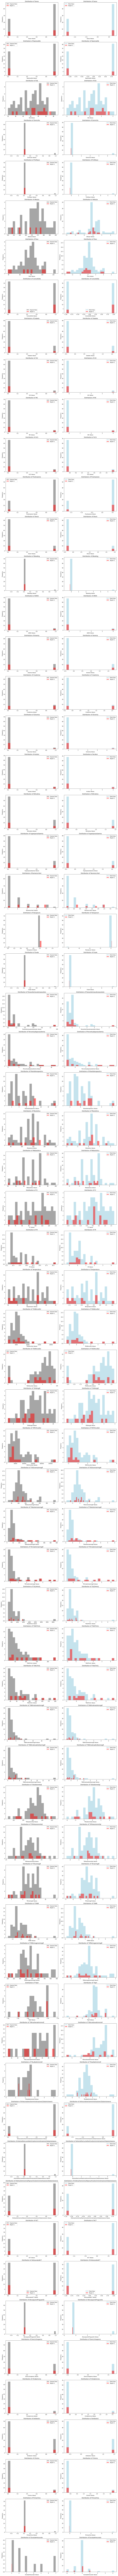

In [314]:
import matplotlib.pyplot as plt
import numpy as np

# List of feature names (columns) in your DataFrames
feature_names_filled = df_ufil_pred.columns
feature_names_original = df_ufil_pred_base.columns

# Determine the number of rows and columns for subplots
num_features_filled = len(feature_names_filled)
num_features_original = len(feature_names_original)

# Choose the maximum number of features between the two DataFrames
max_num_features = max(num_features_filled, num_features_original)

# Create subplots for features and target, arranged in two columns
fig, axes = plt.subplots(nrows=max_num_features, ncols=2, figsize=(15, 5 * max_num_features))

# Plot histograms for each feature in the filled DataFrame
for i, feature in enumerate(feature_names_filled):
    ax = axes[i][1]

    # Extract the original data from the filled DataFrame
    filled_data = df_ufil_pred[feature]

    # Calculate the number of cases with target = 1 for this feature
    num_target_1 = np.sum(target == 1)

    # Filter data where target = 1 and plot it in red
    target_1_data = filled_data[target == 1]

    # Plot the histogram for the filled data
    ax.hist(filled_data, bins=20, alpha=0.7, color='lightblue', label='Filled Data')

    ax.hist(target_1_data, bins=20, alpha=0.5, color='r', label='Target=1')
    
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(f'{feature} Values')
    ax.set_ylabel('Frequency')

    # Add a legend
    ax.legend()

# Plot histograms for each feature in the original DataFrame (if it exists)
for i, feature in enumerate(feature_names_original):
    if i < num_features_filled:
        ax = axes[i][0]

        # Extract the original data from the original DataFrame
        original_data = df_ufil_pred_base[feature]

        # Calculate the number of cases with target = 1 for this feature
        num_target_1 = np.sum(target == 1)

        # Filter data where target = 1 and plot it in red
        target_1_data = original_data[target == 1]

        # Plot the histogram for the original data
        ax.hist(original_data, bins=20, alpha=0.7, color='grey', label='Original Data')

        ax.hist(target_1_data, bins=20, alpha=0.5, color='r', label='Target=1')

        ax.set_title(f'Distribution of {feature}')
        ax.set_xlabel(f'{feature} Values')
        ax.set_ylabel('Frequency')

        # Add a legend
        ax.legend()

# Remove empty subplots if there are more features in one DataFrame than the other
if num_features_filled < num_features_original:
    for i in range(num_features_filled, num_features_original):
        fig.delaxes(axes[i][1])
elif num_features_filled > num_features_original:
    for i in range(num_features_original, num_features_filled):
        fig.delaxes(axes[i][0])

plt.tight_layout()
plt.show()


In [315]:
# # List of feature names (columns) in your DataFrame
# feature_names = df_ufil_pred.columns

# # Determine the number of rows and columns for subplots
# num_features = len(feature_names)
# num_rows = (num_features + 1) // 2  # Two subplots per row
# num_cols = 2

# # Create subplots for features and target
# fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# # Flatten the axes array for easier indexing
# axes = axes.flatten()

# # Plot histograms for each feature
# for i, feature in enumerate(feature_names):
#     ax = axes[i]

#     # Extract the original data
#     original_data = df_ufil_pred[feature]

#     # Calculate the number of cases with target = 1 for this feature
#     num_target_1 = np.sum(target == 1)

#     # Filter data where target = 1 and plot it in red
#     target_1_data = original_data[target == 1]

#     # Plot the histogram for all cases in blue
#     ax.hist(original_data, bins=20, alpha=0.7, color='b', label='All data')

    
#     ax.hist(target_1_data, bins=20, alpha=0.5, color='r', label='Target=1')

#     ax.set_title(f'Distribution of {feature}')
#     ax.set_xlabel(f'{feature} Values')
#     ax.set_ylabel('Frequency')

#     # Add a legend to differentiate between all cases and cases with target=1
#     ax.legend()

# # Remove empty subplots if there are an odd number of features
# if num_features % 2 != 0:
#     fig.delaxes(axes[-1])

# plt.tight_layout()
# plt.show()
